In [18]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

df_train = pd.read_csv("data/smoker_train.csv")
df_train = df_train.drop_duplicates()

# Allgemeine Analyse

In [19]:
df_train.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


## Cross Correlation

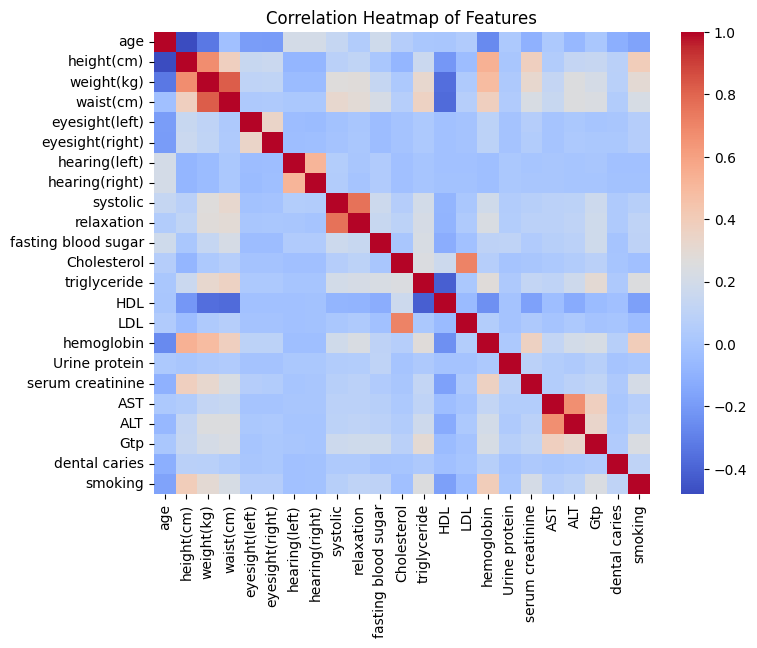

In [20]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

## Class Imbalance

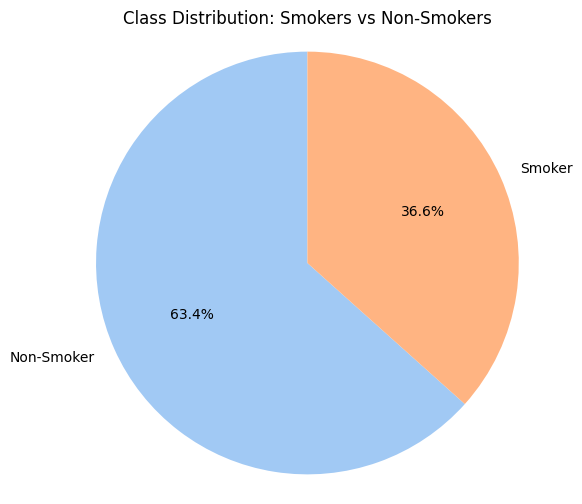

In [ ]:
smoking_counts = df_train['smoking'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(smoking_counts, labels=['Non-Smoker', 'Smoker'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Class Distribution: Smokers vs Non-Smokers')
plt.axis('equal')
plt.show()

# Machine Learning Modelle

## Linear Regression

In [21]:
# Use all columns except 'weight(kg)' and smoking as features
X = df_train[['height(cm)', 'waist(cm)', 'age', 'hemoglobin']]
y = df_train['weight(kg)']

# Split data into training and testing sets (using only training set for comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Training der Modelle
lr_model = LinearRegression().fit(X_train_1, y_train_1)

y_pred = lr_model.predict(X_test_1)

print(f"Intercept: {lr_model.intercept_}")
for name, coef in zip(X.columns, lr_model.coef_):
    print(f"Coefficient for {name}: {coef}")

mse = mean_squared_error(y_test_1, y_pred)
print(f"Test Mean Squared Error: {mse}")

Intercept: -85.67393785255585
Coefficient for height(cm): 0.48268470000487823
Coefficient for waist(cm): 0.9516671200832515
Coefficient for age: -0.14866804586351912
Coefficient for hemoglobin: 0.04087488707372785
Test Mean Squared Error: 24.512838569931095


## Decision Tree

In [40]:
X = df_train[['height(cm)', 'waist(cm)', 'hemoglobin']]
y = df_train['smoking']

# Split data into training and testing sets (using only training set for comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Training der Modelle
dtc = DecisionTreeClassifier(random_state=0, max_leaf_nodes=7).fit(X_train_1, y_train_1)

y_pred_train = dtc.predict(X_train)
y_pred = dtc.predict(X_test)


print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  0.6896126694804467
Accuracy of Decision Tree-Test:  0.695697639677323


[Text(0.5555555555555556, 0.9, 'x[0] <= 162.5\ngini = 0.463\nsamples = 21418\nvalue = [13635, 7783]'),
 Text(0.3333333333333333, 0.7, 'x[2] <= 15.05\ngini = 0.227\nsamples = 8633\nvalue = [7504, 1129]'),
 Text(0.4444444444444444, 0.8, 'True  '),
 Text(0.2222222222222222, 0.5, 'x[2] <= 13.95\ngini = 0.148\nsamples = 7460\nvalue = [6859, 601]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.099\nsamples = 5414\nvalue = [5132, 282]'),
 Text(0.3333333333333333, 0.3, 'x[0] <= 157.5\ngini = 0.263\nsamples = 2046\nvalue = [1727, 319]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.143\nsamples = 1161\nvalue = [1071, 90]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.384\nsamples = 885\nvalue = [656, 229]'),
 Text(0.4444444444444444, 0.5, 'gini = 0.495\nsamples = 1173\nvalue = [645, 528]'),
 Text(0.7777777777777778, 0.7, 'x[2] <= 13.75\ngini = 0.499\nsamples = 12785\nvalue = [6131.0, 6654.0]'),
 Text(0.6666666666666667, 0.8, '  False'),
 Text(0.6666666666666666, 0.5, 'x[0] <= 167.5\ngini = 0.367\nsamples 

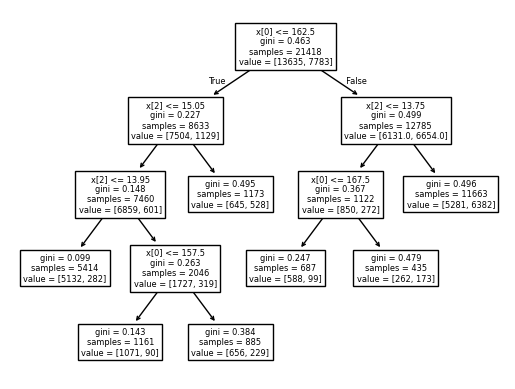

In [41]:
plot_tree(dtc)